***1.) Importing the modules and loading the dataset***

In [1]:
import pandas as pd 
import numpy as np
import re # This module is used to search for pattern, replace text, split strings .etc
import nltk #This module is used for nlp 
# Downloading the stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer #This is used to reduce the words iinto their root form

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Devab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data=pd.read_csv(r"C:\Users\Devab\OneDrive\Desktop\Coding\ACM\S2 Recruitment\TASK-03\IMDB Dataset.csv")

***2.) Preprocessing***

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


**Removing all the punctuations and special characters**

In [5]:
data["review"]=data["review"].apply(lambda x: x.lower()) #Converting the reviews to lower case

In [6]:
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [7]:
# Removing all the punctuations from the text
data["review"]=data["review"].apply(lambda x: re.sub("[^a-zA-Z0-9\s]","",x))

data["review"] = data["review"].apply(lambda x: re.sub(r'\bbr\b', '', x))
# Removing the br tags from the text 
data["review"] = data["review"].apply(lambda x: re.sub(r"<br\s*/?>", " ", x))

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Devab\AppData\Local\Temp\ipykernel_22524\2651320676.py:2: SyntaxWarning: invalid escape sequence '\s'
  data["review"]=data["review"].apply(lambda x: re.sub("[^a-zA-Z0-9\s]","",x))


In [8]:
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming te...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


**Removing all the stopwords**

In [9]:
# Tokenising the text (splitting into words)
data["review"]=data["review"].apply(lambda x: x.split())

In [10]:
data.head()

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",positive
1,"[a, wonderful, little, production, the, filmin...",positive
2,"[i, thought, this, was, a, wonderful, way, to,...",positive
3,"[basically, theres, a, family, where, a, littl...",negative
4,"[petter, matteis, love, in, the, time, of, mon...",positive


In [11]:
from nltk.corpus import stopwords

# creating a list of all the stopwords
stop_words = set(stopwords.words('english'))

# Removing stopwords from the reviews
data["review"] = data["review"].apply(lambda x: [word for word in x if word not in stop_words])

In [12]:
data.head()

,review,sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, e...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, theres, family, little, boy, jake,...",negative
4,"[petter, matteis, love, time, money, visually,...",positive


**Applying Stemming**

In [13]:
# We use stemming to reduce the words to their root form
stemer=PorterStemmer()
data["review"] = data["review"].apply(lambda x: [stemer.stem(word) for word in x])

In [14]:
data.head()

,review,sentiment
0,"[one, review, mention, watch, 1, oz, episod, y...",positive
1,"[wonder, littl, product, film, techniqu, unass...",positive
2,"[thought, wonder, way, spend, time, hot, summe...",positive
3,"[basic, there, famili, littl, boy, jake, think...",negative
4,"[petter, mattei, love, time, money, visual, st...",positive


**Vectorising the dataset using TF-IDF Vectors**

In [15]:
# Vectorisation converts the text into numerical form which can be used for further processing/analysis

# importing the tf-idf vectors 
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer(max_features=2000) # We are taking the top 2000 features from the dataset


In [16]:
# Converting into tf-idf matrix
vec_matrix=vector.fit_transform(data["review"].apply(lambda x: " ".join(x)))

***3.) Importing and training the model***

In [17]:
# Importing the KMeans algorithm
from sklearn.cluster import KMeans

# Fitting the model
model=KMeans(n_clusters=2,random_state=42)

In [18]:
# Fitting the model 
model.fit(vec_matrix)

c:\Users\Devab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

***4.) Interpretation and evaluation of model***

**Calculating and displaying the top 10 terms of each cluster**

In [19]:
terms = vector.get_feature_names_out()
clusters = model.cluster_centers_.argsort()[:, ::-1]

In [20]:
for i in range(2):
    print(f"\nCluster {i+1} top terms:")
    for j in clusters[i,:10]:  # Top 5 terms for each cluster
        print(terms[j])


Cluster 1 top terms:
movi
like
watch
one
bad
good
realli
see
time
make

Cluster 2 top terms:
film
one
like
movi
show
charact
stori
time
good
get


**Visualising the Clusters**

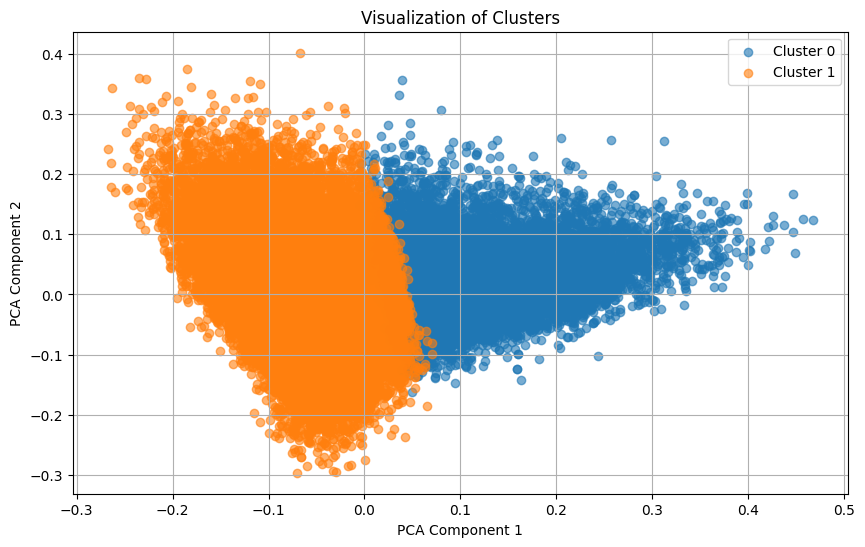

In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Reduce the dimensions of the TF-IDF matrix to 2D using PCA
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(vec_matrix.toarray())

# Assign cluster labels to the data
data['cluster'] = model.labels_

# Step 2: Create a scatter plot of the reduced data
plt.figure(figsize=(10, 6))
for cluster in range(2):
    cluster_points = reduced_data[data['cluster'] == cluster]
    plt.scatter(
        cluster_points[:, 0], cluster_points[:, 1],
        label=f"Cluster {cluster}", alpha=0.6
    )

# Step 3: Add plot details
plt.title("Visualization of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


**Calculating cosine similarity and findinng the 2 most similar texts in the dataset**

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(vec_matrix)

# Finding  the indexes of the two most similar documents 
np.fill_diagonal(cos_sim, 0)  
most_similar = np.unravel_index(np.argmax(cos_sim), cos_sim.shape)

# Displaying the most similar texts
print("\nTwo most similar reviews:")
print("Review 1:", data['review'].iloc[most_similar[0]])
print("Review 2:", data['review'].iloc[most_similar[1]])



Two most similar reviews:
Review 1: ['heavili', 'featur', 'everi', 'list', 'watch', 'keep', 'particular', 'list', 'awar', 'exist', 'long', 'remain', 'accept', 'altern', 'im', 'kid', 'bad', 'movi', 'joseph', 'meeker', 'return', 'dead', 'variou', 'vagu', 'undefin', 'supernatur', 'power', 'employ', 'would', 'seem', 'appear', 'new', 'increasingli', 'comicallook', 'ridiculousand', 'never', 'scari', 'creepi', 'gener', 'goe', 'latter', 'wind', 'bizarr', 'attempt', 'former', 'dont', 'work', 'period', 'outfit', 'stereotypesarchetyp', 'portray', 'david', 'keithwhom', 'respect', 'well', 'least', 'daredevil', 'often', 'terribl', 'inconsistentwhich', 'could', 'also', 'script', 'often', 'top', 'perform', 'charact', 'two', 'person', 'unbeliev', 'irrit', 'theyr', 'pain', 'watch', 'edit', 'think', 'consider', 'clever', 'realli', 'isand', 'earth', 'red', 'tint', 'flashback', 'cinematographi', 'oh', 'dear', 'frame', 'coverag', 'effect', 'use', 'anglethat', 'one', 'could', 'attribut', 'edit', 'perhap', '